# AML-2022 Assignment-3

Submitted by-
- Sampad Kumar Kar (MCS202215)
- Aslah Ahmed Faizi (MCS202222)
- Shourjya Basu (MCS202207)

## Task

Our task is to determine the optimal policy for 2 reward schemes:
1. The classic game, where the goal is to keep the pole upright as long as possible, with a reward of `+1` for every step taken, including the termination step. The goal is to remain upright for as long as possible to maximize the rewards.
2. New version of the game, where the reward is `0` for every time step. But, if the pole angle is in the range `(-12,-6)` or `(6, 12)`, then the reward is `+2`.

## Imports

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Reward Scheme 1

- `+1` for every step taken.

In [2]:
# setting up the environment
env = gym.make('CartPole-v1')

# setting up the learning hyperparameters
LEARNING_RATE = 0.1
DISCOUNT = 0.9
RUNS = 14000
SHOW_EVERY = 2000
UPDATE_EVERY = 100

# setting up the exploration hyperparameters
epsilon = 1
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = RUNS // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)


# create bins and table for Q-values
def create_bins_and_q_table():
	numBins = 20
	obsSpaceSize = len(env.observation_space.high)

	# obtain bucket size
	bins = [
		np.linspace(-4.8, 4.8, numBins),
		np.linspace(-4, 4, numBins),
		np.linspace(-.418, .418, numBins),
		np.linspace(-4, 4, numBins)
	]

	qTable = np.random.uniform(low=-2, high=0, size=([numBins] * obsSpaceSize + [env.action_space.n]))

	return bins, obsSpaceSize, qTable

# obtain discrete state index from the Q-table given the state
def get_discrete_state(state, bins, obsSpaceSize):
	stateIndex = []
	for i in range(obsSpaceSize):
		stateIndex.append(np.digitize(state[i], bins[i]) - 1)
	return tuple(stateIndex)

bins, obsSpaceSize, qTable = create_bins_and_q_table()

# array to store scores over all the episodes
previousCnt = []
# dictionary to store metrics (returns) to draw the graphs
metrics = {'ep': [], 'avg': [], 'min': [], 'max': []}

for run in range(RUNS+ 1):
	discreteState = get_discrete_state(env.reset(), bins, obsSpaceSize)
	# flag to determination termination of episode
	done = False 
	# to store the no. of steps into the episode
	cnt = 0

	while not done:
		# uncomment this to render the event realtime
		# if run % SHOW_EVERY == 0:
		# 	env.render()

		cnt += 1
		# obtain action from the Q-Table
		if np.random.random() > epsilon:
			action = np.argmax(qTable[discreteState])
		# else: sample random action
		else:
			action = np.random.randint(0, env.action_space.n)
		
		# step iteration: take action, observe environment
		newState, reward, done, _ = env.step(action)

		newDiscreteState = get_discrete_state(newState, bins, obsSpaceSize)

		# target: estimate optimal future value of the state
		maxFutureQ = np.max(qTable[newDiscreteState])
		# current estiamte: old value
		currentQ = qTable[discreteState + (action, )]  # old value
		if (abs(newState[2]) > 0.20944 or abs(newState[0]) > 2.4) or cnt >= 500:
			break 

		# update the Q-value
		newQ = (1 - LEARNING_RATE) * currentQ + LEARNING_RATE * (reward + DISCOUNT * maxFutureQ)
		# update the Q-table with the updated Q-values
		qTable[discreteState + (action, )] = newQ

		discreteState = newDiscreteState

	previousCnt.append(cnt)

	# decaying epsilon
	if END_EPSILON_DECAYING >= run >= START_EPSILON_DECAYING:
		epsilon -= epsilon_decay_value

	# update the metrics for the graph
	if run % UPDATE_EVERY == 0:
		latestRuns = previousCnt[-UPDATE_EVERY:]
		averageCnt = sum(latestRuns) / len(latestRuns)
		metrics['ep'].append(run)
		metrics['avg'].append(averageCnt)
		metrics['min'].append(min(latestRuns))
		metrics['max'].append(max(latestRuns))
		print("Run:", run, "Average:", averageCnt, "Min:", min(latestRuns), "Max:", max(latestRuns))


# close the env
env.close()

Run: 0 Average: 17.0 Min: 17 Max: 17
Run: 100 Average: 22.37 Min: 9 Max: 87
Run: 200 Average: 22.91 Min: 8 Max: 68
Run: 300 Average: 24.96 Min: 9 Max: 113
Run: 400 Average: 23.76 Min: 11 Max: 65
Run: 500 Average: 26.8 Min: 9 Max: 97
Run: 600 Average: 22.61 Min: 8 Max: 118
Run: 700 Average: 24.79 Min: 8 Max: 94
Run: 800 Average: 25.65 Min: 10 Max: 74
Run: 900 Average: 30.26 Min: 10 Max: 122
Run: 1000 Average: 27.05 Min: 9 Max: 68
Run: 1100 Average: 26.75 Min: 10 Max: 79
Run: 1200 Average: 28.08 Min: 9 Max: 66
Run: 1300 Average: 31.11 Min: 11 Max: 97
Run: 1400 Average: 33.43 Min: 11 Max: 118
Run: 1500 Average: 32.69 Min: 8 Max: 83
Run: 1600 Average: 31.51 Min: 11 Max: 106
Run: 1700 Average: 34.32 Min: 11 Max: 121
Run: 1800 Average: 36.81 Min: 10 Max: 112
Run: 1900 Average: 36.9 Min: 9 Max: 123
Run: 2000 Average: 34.76 Min: 10 Max: 111
Run: 2100 Average: 42.88 Min: 10 Max: 118
Run: 2200 Average: 38.95 Min: 9 Max: 121
Run: 2300 Average: 42.44 Min: 10 Max: 107
Run: 2400 Average: 44.48 Min: 

Let's look at the graph to look at the average, minimum and maximum returns at the end of each run.

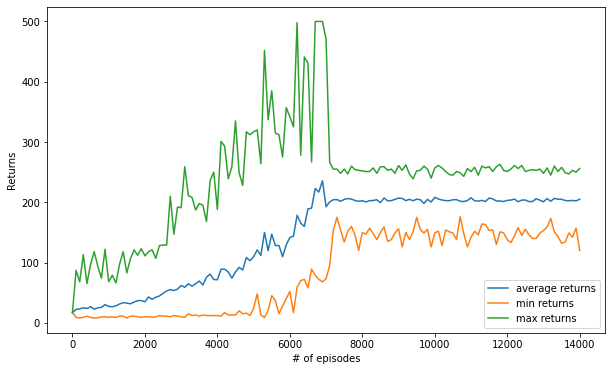

In [5]:
# plotting the graph
plt.figure(figsize=(10,6))
plt.plot(metrics['ep'], metrics['avg'], label="average returns")
plt.plot(metrics['ep'], metrics['min'], label="min returns")
plt.plot(metrics['ep'], metrics['max'], label="max returns")
plt.xlabel("# of episodes")
plt.ylabel("Returns")
plt.legend(loc=4)
plt.show()

We can also look at the updated Q-Table to obtain the optimal Q-Values at the end. This is stored in the `qTable` variable.

In [6]:
qTable.shape

(20, 20, 20, 20, 2)

## Reward Scheme 2

- `0` reward for every time step.
- `+2` reward if the pole angle is in the range `(-12,-6)` or `(6, 12)`.

In [7]:
# setting up the environment
env = gym.make('CartPole-v1')

# setting up the learning hyperparameters
LEARNING_RATE = 0.1
DISCOUNT = 0.9
RUNS = 14000
SHOW_EVERY = 2000
UPDATE_EVERY = 100

# setting up the exploration hyperparameters
epsilon = 1
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = RUNS // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)


# create bins and table for Q-values
def create_bins_and_q_table():
    numBins = 20
    obsSpaceSize = len(env.observation_space.high)

	# obtain bucket size
    bins = [
        np.linspace(-4.8, 4.8, numBins),
        np.linspace(-4, 4, numBins),
        np.linspace(-.418, .418, numBins),
        np.linspace(-4, 4, numBins)]
            

    qTable = np.random.uniform(low=-2, high=0, size=([numBins] * obsSpaceSize + [env.action_space.n]))

    return bins, obsSpaceSize, qTable


# obtain discrete state index from the Q-table given the state
def get_discrete_state(state, bins, obsSpaceSize):
    stateIndex = []
    for i in range(obsSpaceSize):
        stateIndex.append(np.digitize(state[i], bins[i]) - 1)
    return tuple(stateIndex)

bins, obsSpaceSize, qTable = create_bins_and_q_table()

# array to store scores over all the episodes
previousCnt = []
# dictionary to store metrics (returns) to draw the graphs
metrics = {'ep': [], 'avg': [], 'min': [], 'max': []}

for run in range(RUNS+1):
    discreteState = get_discrete_state(env.reset(), bins, obsSpaceSize)
    # flag to determination termination of episode
    done = False
    # to store the no. of steps into the episode
    cnt = 0

    while not done:
		# uncomment this to render the event realtime
		# if run % SHOW_EVERY == 0:
		# 	env.render()

        cnt += 1
		# obtain action from the Q-Table
        if np.random.random() > epsilon:
            action = np.argmax(qTable[discreteState])
		# else: sample random action
        else:
            action = np.random.randint(0, env.action_space.n)
        
        # step iteration: take action, observe environment
        newState, reward, done, _ = env.step(action)

        # updated reward condition
        if (newState[2] > 0.104 and newState[2] < .209) or (newState[2] < -0.104 and newState[2] > -.209):
            reward = 2
        else:
            reward = 0

        newDiscreteState = get_discrete_state(newState, bins, obsSpaceSize)
    
        # target: estimate optimal future value of the state
        maxFutureQ = np.max(qTable[newDiscreteState])
        # current estiamte: old value
        currentQ = qTable[discreteState + (action, )]

		# update the Q-value
        newQ = (1 - LEARNING_RATE) * currentQ + LEARNING_RATE * (reward + DISCOUNT * maxFutureQ)
        # update the Q-table with the updated Q-values
        qTable[discreteState + (action, )] = newQ

        discreteState = newDiscreteState

    previousCnt.append(cnt)
  

	# decaying epsilon
    if END_EPSILON_DECAYING >= run >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

	# update the metrics for the graph
    if run % UPDATE_EVERY == 0:
        latestRuns = previousCnt[-UPDATE_EVERY:]
        averageCnt = sum(latestRuns) / len(latestRuns)
        metrics['ep'].append(run)
        metrics['avg'].append(averageCnt)
        metrics['min'].append(min(latestRuns))
        metrics['max'].append(max(latestRuns))
        print("Run:", run, "Average:", averageCnt, "Min:", min(latestRuns), "Max:", max(latestRuns))

env.close()

Run: 0 Average: 11.0 Min: 11 Max: 11
Run: 100 Average: 21.89 Min: 8 Max: 74
Run: 200 Average: 22.78 Min: 9 Max: 71
Run: 300 Average: 20.76 Min: 9 Max: 62
Run: 400 Average: 20.03 Min: 8 Max: 73
Run: 500 Average: 22.35 Min: 9 Max: 68
Run: 600 Average: 20.17 Min: 9 Max: 92
Run: 700 Average: 20.36 Min: 9 Max: 55
Run: 800 Average: 20.86 Min: 8 Max: 69
Run: 900 Average: 21.8 Min: 8 Max: 56
Run: 1000 Average: 21.18 Min: 9 Max: 84
Run: 1100 Average: 19.97 Min: 9 Max: 63
Run: 1200 Average: 19.0 Min: 9 Max: 61
Run: 1300 Average: 19.05 Min: 9 Max: 67
Run: 1400 Average: 19.32 Min: 9 Max: 46
Run: 1500 Average: 19.45 Min: 9 Max: 51
Run: 1600 Average: 19.06 Min: 9 Max: 50
Run: 1700 Average: 19.93 Min: 9 Max: 74
Run: 1800 Average: 19.0 Min: 9 Max: 60
Run: 1900 Average: 18.8 Min: 9 Max: 49
Run: 2000 Average: 18.78 Min: 9 Max: 54
Run: 2100 Average: 18.69 Min: 8 Max: 69
Run: 2200 Average: 19.46 Min: 8 Max: 52
Run: 2300 Average: 19.6 Min: 9 Max: 71
Run: 2400 Average: 20.23 Min: 10 Max: 53
Run: 2500 Averag

Let's look at the graph to look at the average, minimum and maximum returns at the end of each run.

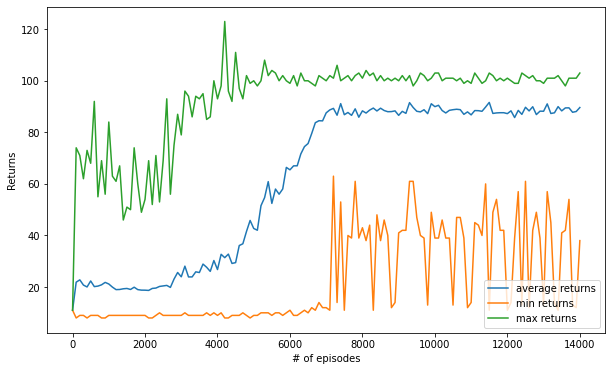

In [8]:
# plotting the graph
plt.figure(figsize=(10,6))
plt.plot(metrics['ep'], metrics['avg'], label="average returns")
plt.plot(metrics['ep'], metrics['min'], label="min returns")
plt.plot(metrics['ep'], metrics['max'], label="max returns")
plt.xlabel("# of episodes")
plt.ylabel("Returns")
plt.legend(loc=4)
plt.show()

We can also look at the updated Q-Table to obtain the optimal Q-Values at the end. This is stored in the `qTable` variable.

In [9]:
qTable.shape

(20, 20, 20, 20, 2)